### Load Data

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA (Explanatory Data Analysis) and Feature Selection
Are there any missing values?

In [3]:
df[df.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Great! Lets get general idea of the features in the data.  

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

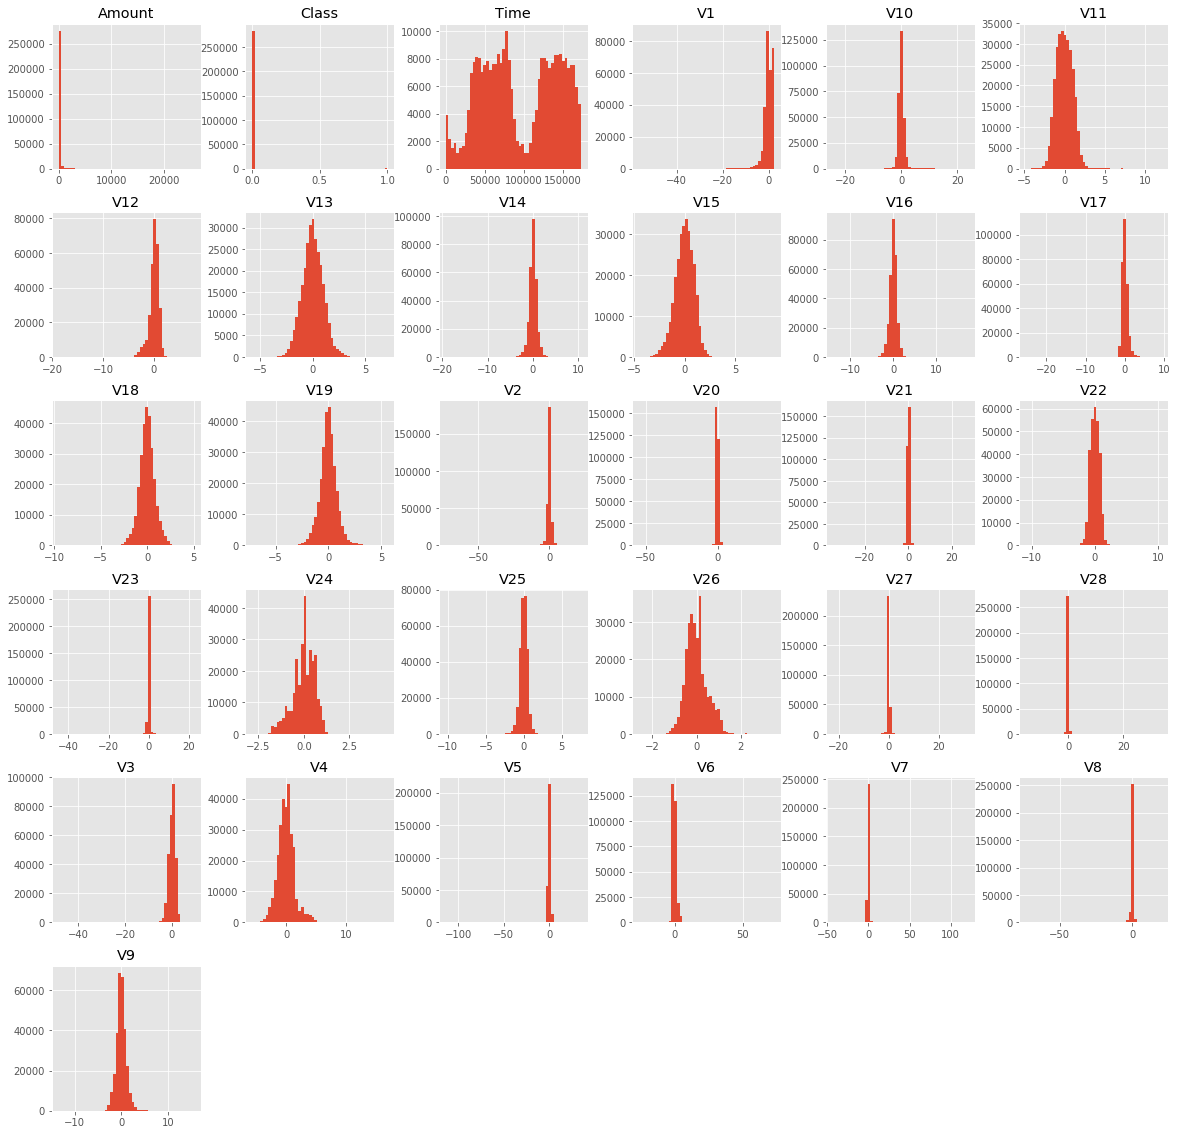

In [5]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

Time!

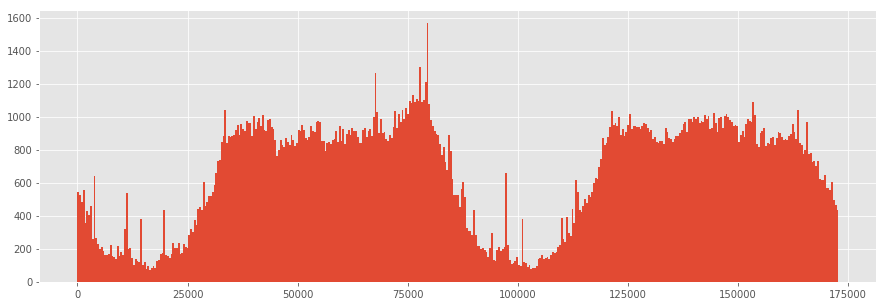

In [6]:
df['Time'].hist(bins = 425, figsize = (15,5))
plt.show()

Clearly, it looks like there are cycles.  We take a complete cycle.    

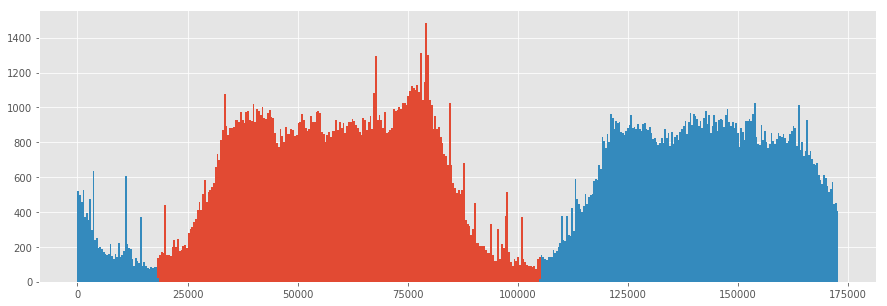

In [7]:
Data = df.loc[(df['Time']>18103) & (df['Time']<105172),:]
Data_test = df.loc[(df['Time']<18104) | (df['Time']>105171),:] 

Data['Time'].hist(bins = 213, figsize = (15,5))
Data_test['Time'].hist(bins = 450, figsize = (15,5))
plt.show()

In [8]:
Data = Data.reset_index()
Data = Data.drop('index', axis =1)

Data_test = Data_test.reset_index()
Data_test = Data_test.drop('index', axis = 1)

In [9]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,144635.0,59325.275058,19411.543922,18105.000000,42957.000000,59655.000000,75362.000000,105171.000000
V1,144635.0,-0.227905,1.867297,-56.407510,-1.019082,-0.234443,1.168737,2.439207
V2,144635.0,0.028488,1.645198,-72.715728,-0.558440,0.107464,0.795920,22.057729
V3,144635.0,0.572372,1.347815,-33.680984,0.063658,0.674833,1.314859,9.382558
V4,144635.0,0.126765,1.350338,-5.519697,-0.727676,0.146653,0.960245,16.875344
V5,144635.0,-0.244619,1.342830,-42.147898,-0.888790,-0.285128,0.296843,34.801666
V6,144635.0,0.065100,1.289995,-26.160506,-0.679506,-0.190127,0.454858,22.529298
V7,144635.0,-0.106349,1.225481,-43.557242,-0.604742,-0.049893,0.434226,36.677268
V8,144635.0,0.055897,1.249933,-73.216718,-0.141828,0.076172,0.372668,20.007208
V9,144635.0,-0.076384,1.118200,-13.434066,-0.714463,-0.151438,0.496732,15.594995


In [10]:
normal = Data.loc[Data['Class'] == 0, :]
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,144330.0,59320.390335,19398.239899,18105.000000,42970.250000,59656.000000,75349.000000,105171.000000
V1,144330.0,-0.214120,1.810318,-56.407510,-1.015090,-0.229772,1.169169,2.439207
V2,144330.0,0.018896,1.618638,-72.715728,-0.559749,0.105579,0.790708,18.902453
V3,144330.0,0.591197,1.225317,-33.680984,0.068315,0.676906,1.316130,9.382558
V4,144330.0,0.116878,1.327093,-5.519697,-0.729612,0.143554,0.955407,16.875344
V5,144330.0,-0.234740,1.298687,-42.147898,-0.886177,-0.283923,0.297277,34.801666
V6,144330.0,0.068172,1.286040,-26.160506,-0.677566,-0.188897,0.455878,22.529298
V7,144330.0,-0.090541,1.115794,-31.764946,-0.602425,-0.048603,0.435108,36.677268
V8,144330.0,0.054483,1.188649,-73.216718,-0.141814,0.075854,0.371306,18.709255
V9,144330.0,-0.070149,1.103690,-6.290730,-0.711798,-0.150218,0.497744,15.594995


In [11]:
fraud = Data.loc[Data['Class'] == 1, :]
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,305.0,61636.790164,24855.782232,18399.000000,41233.000000,58822.000000,85285.000000,103808.000000
V1,305.0,-6.751482,7.758737,-30.552380,-10.850282,-3.705856,-1.278138,1.954852
V2,305.0,4.567874,4.811885,-6.976420,1.291195,3.253892,6.990389,22.057729
V3,305.0,-8.335711,8.466782,-31.103685,-13.030455,-5.264265,-1.703826,2.250210
V4,305.0,4.805211,3.061371,-1.313275,2.425436,4.319241,6.577056,12.114672
V5,305.0,-4.919821,5.932372,-22.105532,-8.213093,-3.045621,-0.662280,11.095089
V6,305.0,-1.388383,2.093530,-5.430971,-2.683286,-1.347462,-0.354900,6.474115
V7,305.0,-7.587056,8.195492,-43.557242,-13.547302,-5.015848,-1.624608,5.802537
V8,305.0,0.725107,8.489329,-41.044261,-0.233403,0.764555,2.998419,20.007208
V9,305.0,-3.026893,2.794283,-13.434066,-4.495679,-2.558691,-0.912189,3.353525


When looking at the descriptive statistics you can tell the centroid of the the two group are quite different . Also notice the standard deviation in PCA_1, which holds most of the variation, is 1.8 for normal calss while standard deviation fraud class at 7 can be considered extream. 

Lets take closer look at our features.  

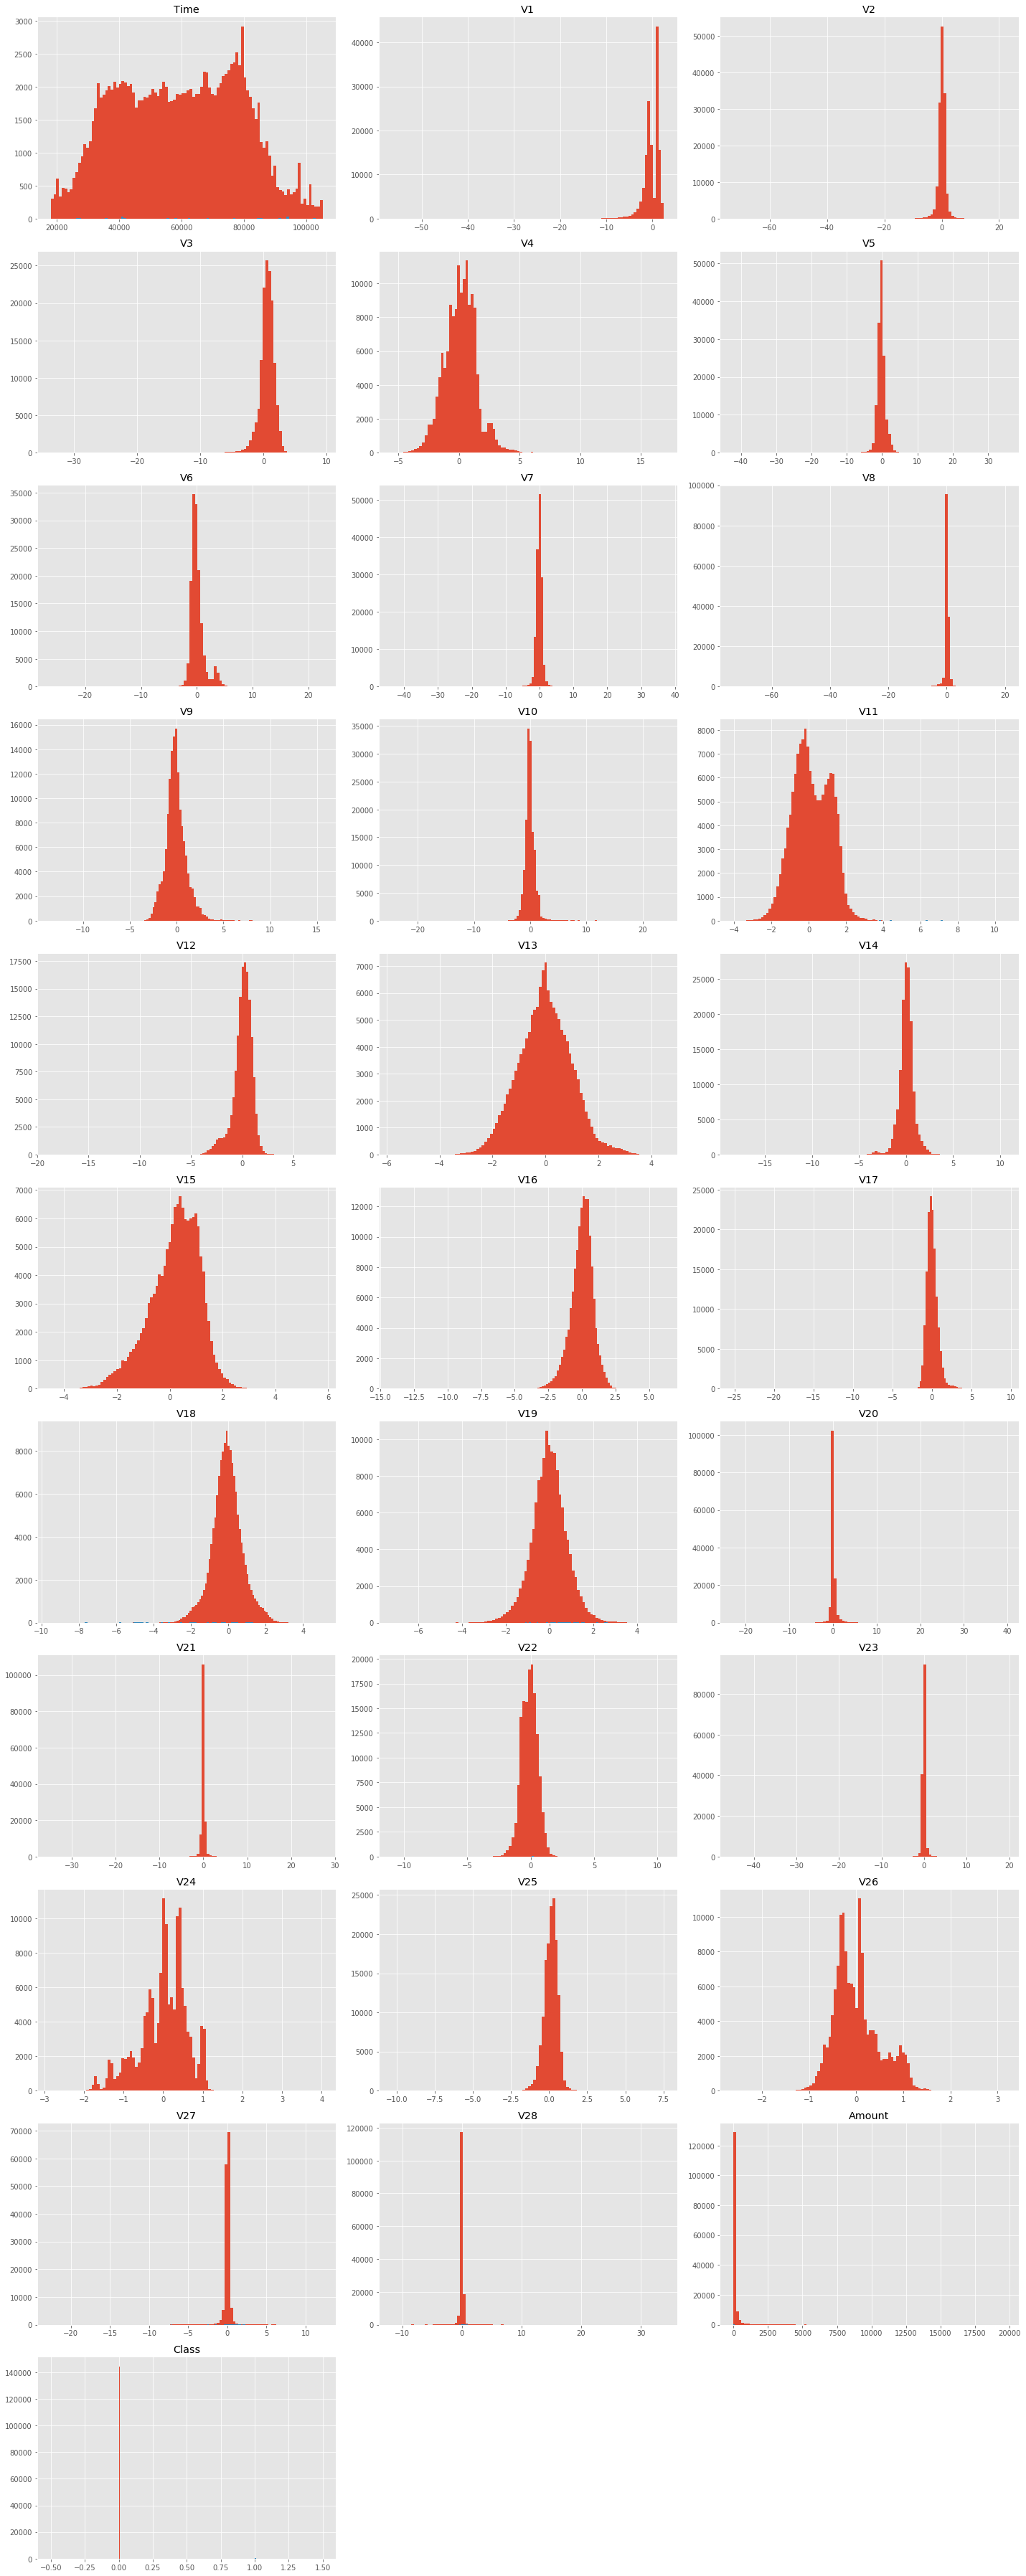

In [12]:
plt.figure(figsize=(20,50))
i=1
for feature in normal.columns:
    plt.subplot(11,3,i)
    plt.hist(normal[feature], bins = 100)
    plt.hist(fraud[feature],bins = 100)
    plt.title(feature)
    i=i+1
plt.tight_layout()
plt.show()

It is very difficult to detect fraud transaction because in addition to severe class imbalance there is also severe class overlap.  Fraud transactions are mixed in with the normal ones.  It is important to go through the features one by one and make sure its appropriate to pass it to the models.  

We want enough features to be able to say something about the distribution but don't want too many as this will introduce noise.   

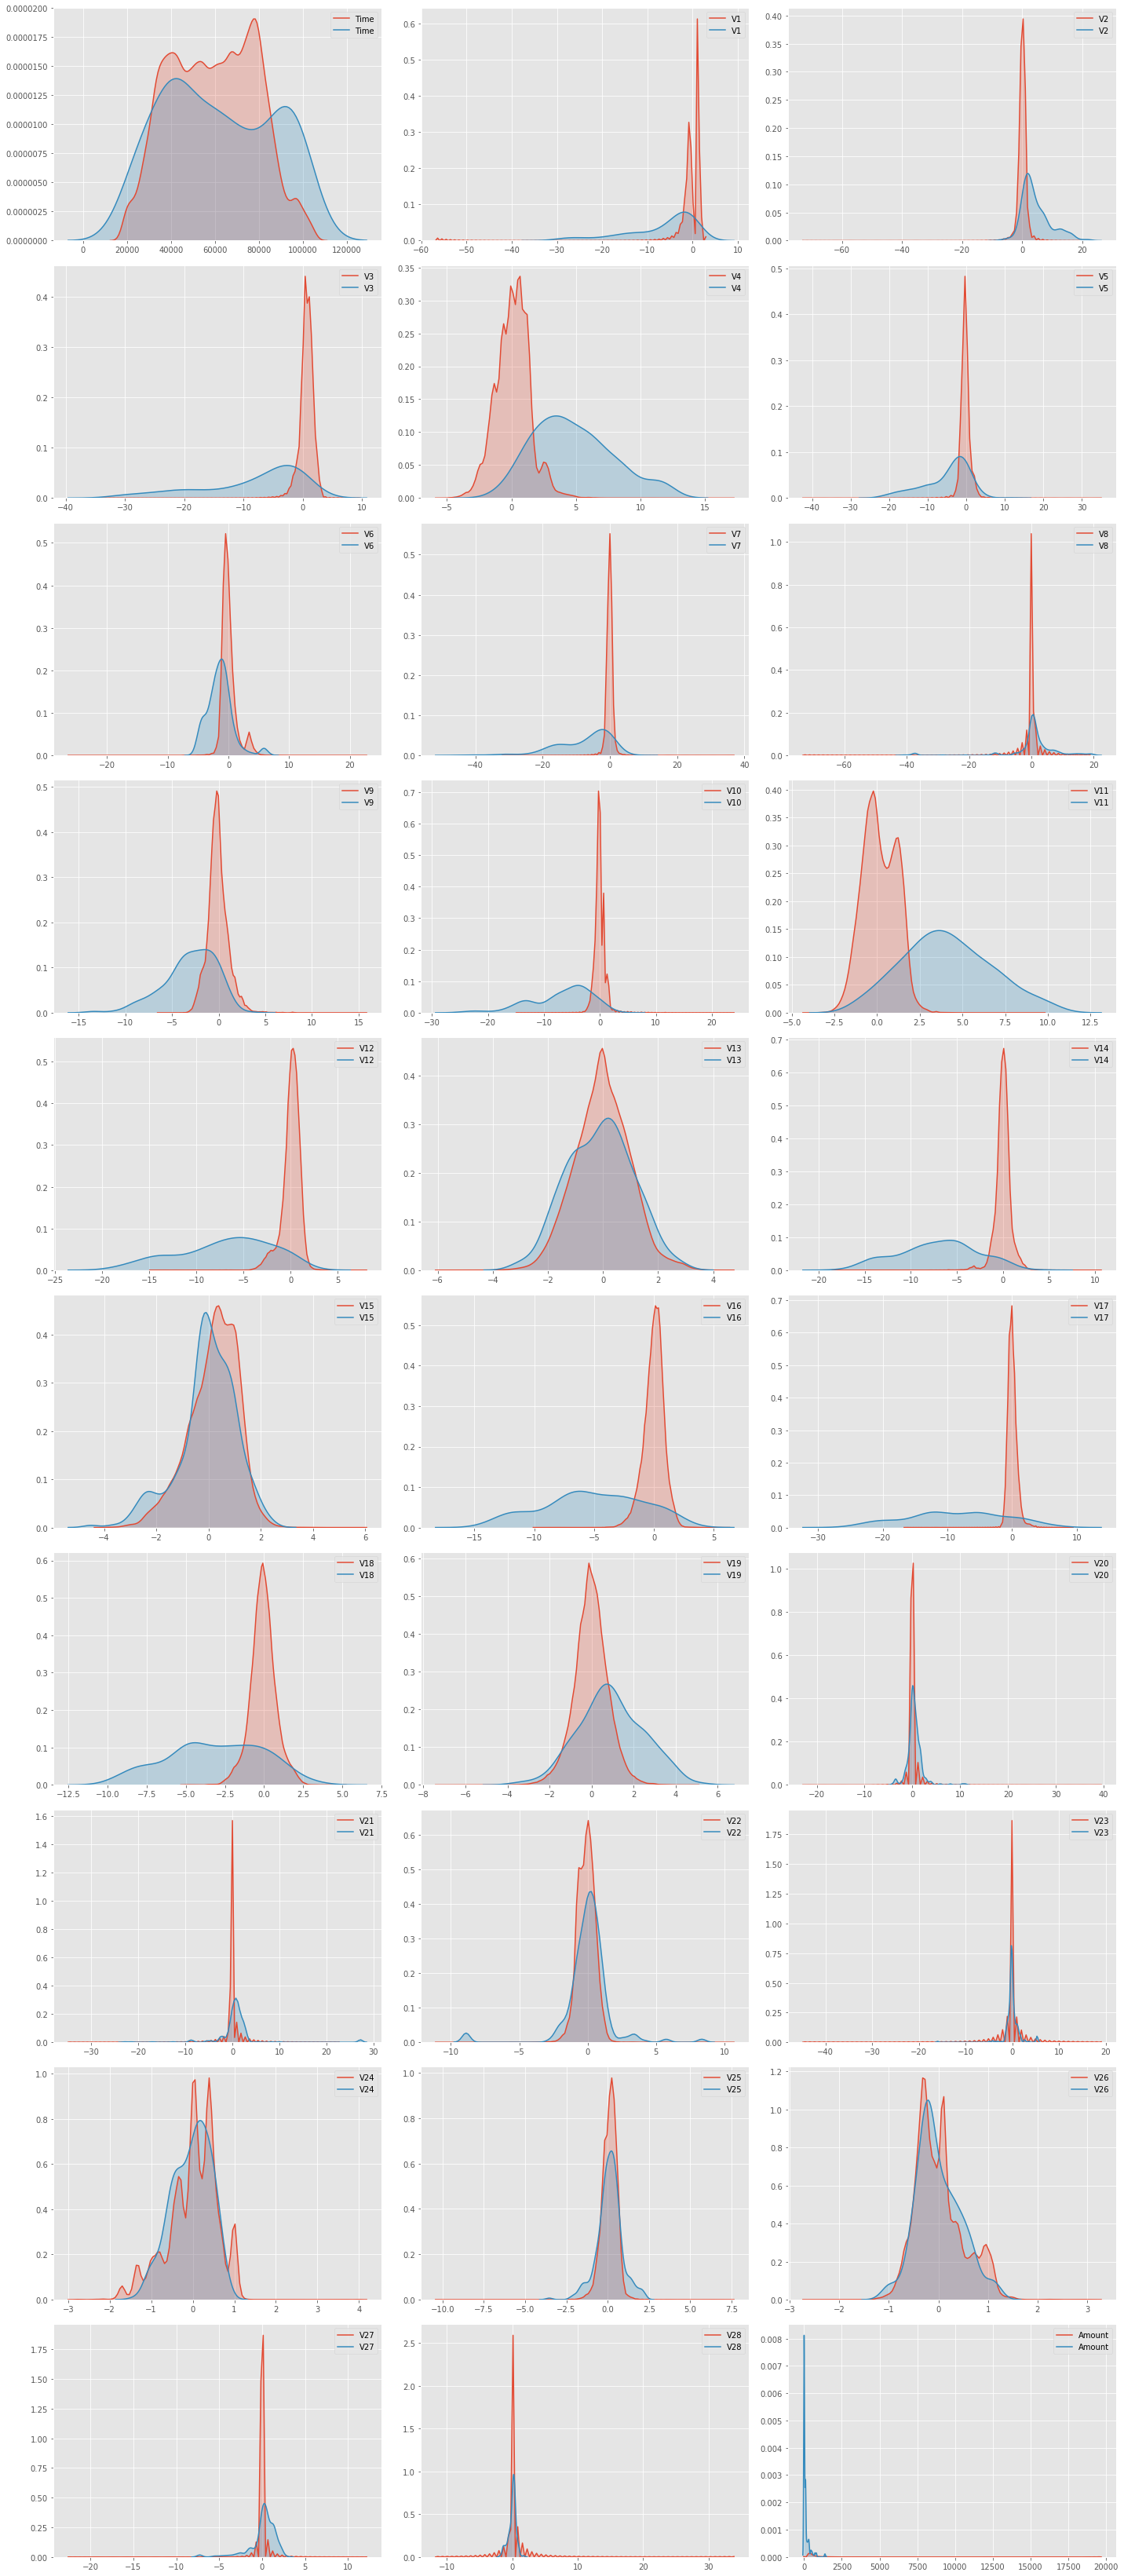

In [13]:
features = Data.columns[:-1]

plt.figure(figsize=(20,50))
i=1
for feature in features:
    plt.subplot(11,3,i)
    sns.kdeplot(normal[feature], shade= True)
    sns.kdeplot(fraud[feature], shade= True)
    i=i+1
    plt.tight_layout()
plt.show()

Fraud is also very hard to detect because they are hiding in a lower dimensional subspace.  By looking at the kernel densities of the features we can select for features that can help to identify fraud transactions.   

# This part is for dimensionality reduction using PCA

In [14]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [15]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()
finalDf.tail()

,principal component 1,principal component 2,Class
284802,9.656607,-9.460633,0
284803,0.467857,-0.601727,0
284804,-1.998509,1.216471,0
284805,-0.040820,-0.604940,0
284806,0.550545,0.401899,0


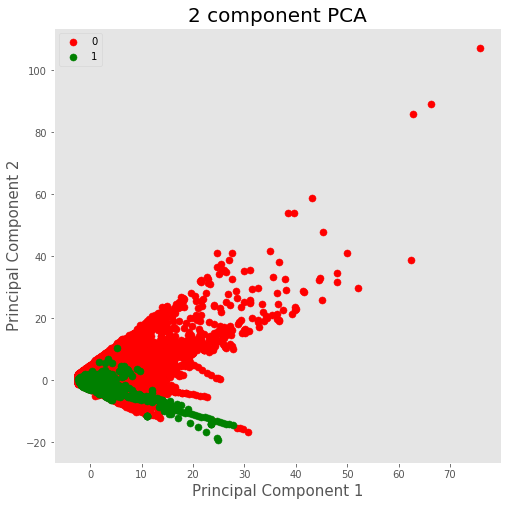

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Visualization of Data Frequency after PCA

Text(0, 0.5, 'Frequency')

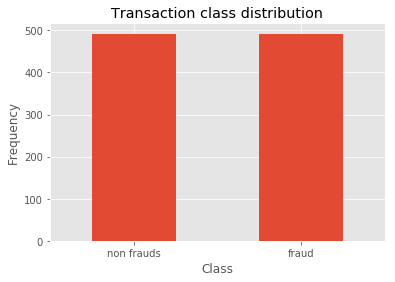

In [17]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
new_df = new_df.sample(frac=1, random_state=42)

labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

# This part is for classifying process

In [18]:
column = ['principal component 1', 'principal component 2']

In [19]:
X = finalDf.loc[:,column]
y = finalDf['Class']
print(X.shape)
print(y.shape)

(284807, 2)
(284807,)


In [20]:
X1_train, X1_test, Y1_train, Y1_test  = train_test_split(X, y,test_size=.2, stratify=y, random_state=42)

In [21]:
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(227845, 2)
(56962, 2)
(227845,)
(56962,)


In [22]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from scipy.stats.mstats import winsorize


# #scale between (0,1)
# Data_norm = MinMaxScaler().fit_transform(Data.iloc[:,:-1])
# Data_norm = pd.DataFrame(Data_norm)
# Data_norm['Class'] = Data['Class']
# normal = Data_norm.loc[Data_norm['Class'] == 0, :]
# fraud = Data_norm.loc[Data_norm['Class'] == 1, :]

# print(normal.head())
# print("-----------------------------------")
# print(fraud.tail())

Here we select for the features that make sense in this data.

In [23]:
# columns = [1,2,3,4,5,7,9,10,11,12,14,16,17,18,29]

We need to further reduce rows in the data but while retaining the meaningful information.  This is just to save time during training.  

In [24]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix
# Data = Data_norm.sample(frac = .2, random_state = 42)
# X = Data.loc[:,columns]
# y = Data['Class']
# print(X.shape)
# print(y.shape)

In [25]:
# X1_train, X1_test, Y1_train, Y1_test  = train_test_split(X, y,test_size=.3, stratify=y, random_state=42)

## Modeling

Lets realize that we are looking for a needle in a hay barn.  99.83% of the data are normal transactions.  We could balance the data by oversampling or undersampling.  But we want our models to be able to produce results in the real word not just in testing environment. This is why we should use the unbalanced data, in order to better simulate real world cases. If our model can identify even a fraction of fraud cases, it is adding value.  

In [26]:

classifiers = {
    "ISOLATION FOREST":IsolationForest(n_estimators=155, max_samples=len(X), 
                                       contamination=.00194,random_state=42, verbose=0),
    "LOCAL OUTLIER FACTOR":LocalOutlierFactor(n_neighbors=200, algorithm='auto', leaf_size=230, 
                            metric='euclidean', p=1, metric_params=None, contamination=.0021),
    "LOGISTIC REGRESSION": LogisticRegression(),
    "ONE CLASS SVM":OneClassSVM(kernel='rbf', degree=3, gamma = 'auto', nu=0.00215, max_iter=-1)
}

In [27]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "LOCAL OUTLIER FACTOR":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "LOGISTIC REGRESSION":
        clf.fit(X1_train,Y1_train)
#         y_pred = clf.predict(X1_test)
    elif clf_name == "ONE CLASS SVM":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    if clf_name == "LOGISTIC REGRESSION":
        print(clf_name)
        y_pred = clf.predict(X1_test)
        n_errors = (y_pred != Y1_test).sum()
        print("number of errors:", n_errors)
        print(classification_report(Y1_test, y_pred))
    else: 
        n_errors = (y_pred != y).sum()
        # Run Classification Metrics
        print("{} number of errors: {}".format(clf_name,n_errors))
        print(pd.crosstab(y, y_pred)) 
        print('silhouette coefficient:',round(metrics.silhouette_score(finalDf, y_pred, metric='euclidean'), 3))
        print('Adjusted Rand index   :',round(metrics.adjusted_rand_score(y, y_pred),3))
        print("Classification Report :") 
        print(classification_report(y,y_pred))

ISOLATION FOREST number of errors: 909
col_0       0    1
Class             
0      283830  485
1         424   68
silhouette coefficient: 0.891
Adjusted Rand index   : 0.128
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.12      0.14      0.13       492

    accuracy                           1.00    284807
   macro avg       0.56      0.57      0.56    284807
weighted avg       1.00      1.00      1.00    284807

LOCAL OUTLIER FACTOR number of errors: 889
col_0       0    1
Class             
0      283817  498
1         391  101
silhouette coefficient: 0.778
Adjusted Rand index   : 0.183
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.17      0.21      0.19       492

    accuracy                           1.00    284807
   macro avg       0.58      0.60      0.59    284807

Choose parameters in a way that makes sense.   

As you can see there was only 61 fraud out of 28,927 transaction. Isolation forest is doing great. But LOF is even better! The scores can be tuned depending if we are interested in higher recall or precision. It depends on the type of fraud the bank is looking for.  



Next let's see how we can use AutoEncoder to produce a label step by step.   

In [28]:
# pip install pyod

In [29]:
# from sklearn.decomposition import PCA

# Lets take a look at our sample in the 1st and 2nd PCA so we can get a general idea of the distribution. 

In [30]:
# pca = PCA(2)
# x_pca = pca.fit_transform(X)
# x_pca = pd.DataFrame(x_pca)
# x_pca.columns = ['pc1', 'pc2']

# plt.figure(figsize=(12,8))
# plt.title('Sample Distribution on First 2 PCAs by Class Color')
# plt.scatter(x_pca['pc1'], x_pca['pc2'], alpha = .6, c=y)
# plt.show()

# Lets use AutoEncoder to reduce the dimensions in the hidden layers.  

In [31]:
# clf1 = AutoEncoder(hidden_neurons =[15, 10, 6, 2, 2, 6, 10, 15], epochs = 26, contamination = .002)
# clf1.fit(X)

In [32]:
# y_scores = clf1.decision_scores_
# y_scores = clf1.decision_function(X)  #map all points to one a line
# y_scores = pd.Series(y_scores)

The points far away from the mean of the distribution are outliers.  Lets look at a graph and decide what score to use in order to produce the labels.  

In [33]:
# plt.figure(figsize=(15,50))
# plt.axvline(23.5, color = 'b', alpha = .9)
# plt.hist(y_scores, bins=1000)  
# plt.title("Histogram for Model Clf1 Anomaly Scores")
# plt.show()

I think 23.5 looks about right.

In [34]:
# x_pca['clf1_score'] = y_scores
# x_pca['cluster'] = np.where(x_pca['clf1_score'] < 23.5, 0, 1)
# x_pca['cluster'].value_counts()

In [35]:
# Class = y.reset_index()
# Class = Class.drop('index', axis =1)
# x_pca['Class'] = Class

Lets check out the scores.

In [36]:
# n_errors = (x_pca.cluster != x_pca.Class).sum()
# print("AutoEncoder number of errors: {}".format(n_errors))
# print(pd.crosstab(x_pca.Class, x_pca.cluster))
# print('silhouette coefficient:',round(metrics.silhouette_score(x_pca, x_pca.cluster, metric='euclidean'), 3))
# print('Adjusted Rand index   :',round(metrics.adjusted_rand_score(x_pca.Class, x_pca.cluster),3))
# print("Classification Report :")
# print(classification_report(x_pca.Class, x_pca.cluster))

In [37]:
# plt.figure(figsize=(12,8))
# plt.title('Sample Distribution on First 2 PCAs by Prediction Color')
# plt.scatter(x_pca['pc1'], x_pca['pc2'], alpha = .6, c=x_pca['cluster'])
# plt.show()

It may seem obvious where the outliers are but it can be hard for an algorithm.  We are only looking at it in 2 dimensions but there are 13 more unseen cardinal directions.  

### Conclusion
Results of the models, the labels, can be treated as a new categorical feature to be used in supervised training.  If in some random forest a branch is split on this feature because it reduced enthalpy the most in that generation, then we can say these models have made some amount of contribution.  In the future I will incorporate DBSCAN which is another density based algorithm like LOF. 

Anomaly detection is a large subject.  The methods used to identify them vary greatly depending on the type of anomalous activity.  In this project, all of the models with the exception of One Class SVM showed good promise as anomaly detectors.  The scores indicates LOF(density based) performs best for the type of attack pattern presented this data set.  


## References
These are not my original ideas.  This is my current understanding on the subject after consulting the blogs and videos below.  

https://www.youtube.com/watch?v=5p8B2Ikcw-k&t=762s, Elena Sharova

https://www.youtube.com/watch?v=rHSpab1Wi9k&t=924s,Leela Senthil Nathan

https://www.youtube.com/watch?v=RyFQXQf4w4w&t=319s,Jan Van Der Vegt

https://github.com/krishnaik06/Credit-Card-Fraudlent, Krish C Naik

https://neurospace.io/blog/2019/03/predicting-credit-card-fraud-with-unsupervised-learning/,  Maria Jensen 

Please up vote if you read this far.  The technique may yield a few extra basis points.  This is my current understanding.  Please let me know if you think I have some misunderstanding on the subject.  I would enjoy learning more about techniques to map data from higher dimensions to lower ones. 